# Implementation of the optimal transport distance for densities $f(x)$ and $g(y)$ for $x,y \in \mathbb{R}$ and the $L^2$ distance. 

In this case the $L^2$ distance is strictly convex so can use the northwest corner method. 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def normalise(source, target):
    return np.multiply(source, np.sum(target))

In [3]:
def northwestcorner(source, target):

    # normalise densities to have equal sum. Integers for ease.
    
    f_x = normalise(source, target)
    g_y = normalise(target, source)
    
    m = len(f_x)
    n = len(g_y)
       
    transport_cost = 0
    i = 0
    j = 0
    
    if m <= 128 and n <= 128: # visualise the mapping
    
        matrix_map = np.zeros((m, n)) # Can create heatmap to visualise mapping. Only for small m, n!

        while i < m and j < n:

            if g_y[j] == 0: 
                j += 1

            elif f_x[i] == 0: # if supply/demand if empty, skip. 
                i += 1

            else:

                if f_x[i] - g_y[j] > 0:
                    f_x[i] -= g_y[j]
                    transport_cost += (i/(m-1) - j/(n-1)) ** 2 * g_y[j] # density * cost to transport
                    matrix_map[i,j] = g_y[j]
                    j += 1

                elif f_x[i] - g_y[j] < 0:
                    g_y[j] -= f_x[i]
                    transport_cost += (i/(m-1) - j/(n-1)) ** 2 * f_x[i] # density * cost to transport
                    matrix_map[i,j] = f_x[i]
                    i += 1

                else: 
                    transport_cost += (i/(m-1) - j/(n-1)) ** 2 * f_x[i] # density * cost to transport
                    matrix_map[i,j] = f_x[i]
                    i += 1                
                    j += 1
                    
        transport_cost = transport_cost / float(sum(f_x)) # normalise to make metric comparable
    
        return matrix_map, transport_cost
    
    else:
        
        while i < len(source) and j < len(target):

            if target[j] == 0: 
                j += 1

            elif source[i] == 0:
                i += 1

            else:

                if f_x[i] - g_y[j] > 0:
                    f_x[i] -= g_y[j]
                    transport_cost += (i/(m-1) - j/(n-1)) ** 2 * g_y[j]
                    j += 1

                elif f_x[i] - g_y[j] < 0:
                    g_y[j] -= f_x[i]
                    transport_cost += (i/(m-1) - j/(n-1)) ** 2 * f_x[i]
                    i += 1

                else: 
                    transport_cost += (i/(m-1) - j/(n-1)) ** 2 * f_x[i]
                    i += 1                
                    j += 1
        
        transport_cost = transport_cost / float(sum(f_x))
        
        return transport_cost

In [4]:
m = 32
n = 64

source = np.random.randint(100, size = m)
target = np.random.randint(100, size = n)

In [5]:
map, cost = northwestcorner(source, target)


Transport cost: 0.02619543398062144


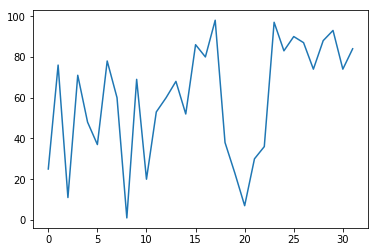

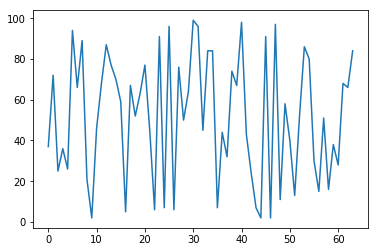

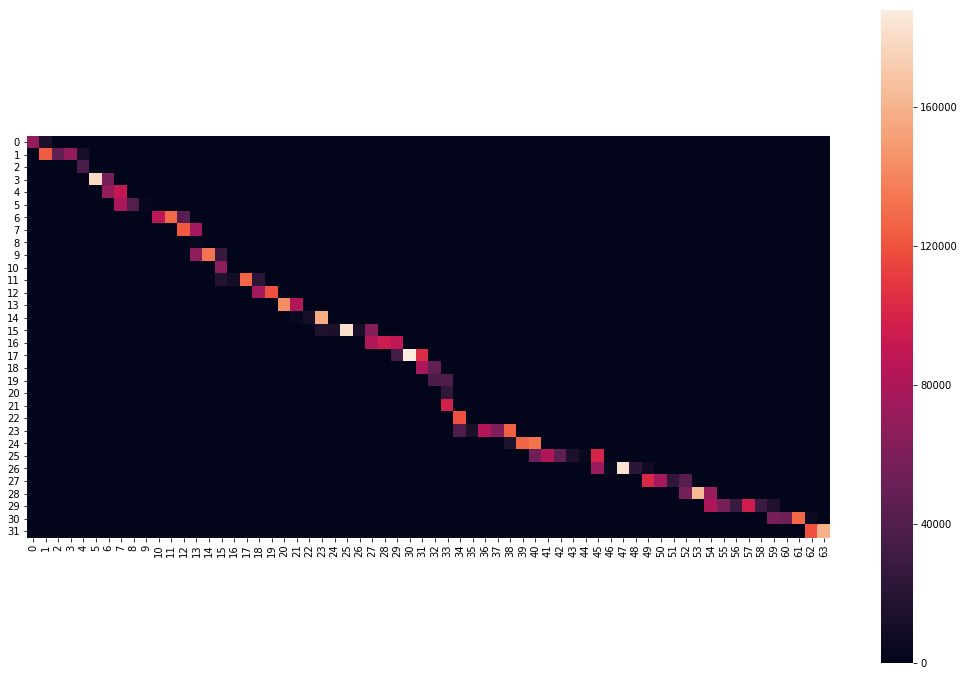

In [6]:
print('\n' + 'Transport cost: ' + str(cost))

plt.plot(source)
plt.show()

plt.plot(target)
plt.show()

plt.gcf().set_size_inches(18,12)
plt.gca().set_aspect('equal')

sns.heatmap(map)

## Test cases

Try unit mapping. Transport cost should be 1. 

In [7]:
m = 16
n = 16

source = np.zeros(m)
source[m-1] = 10

target = np.zeros(n)
target[0] = 5

In [8]:
map, cost = northwestcorner(source, target)


Transport cost: 1.0


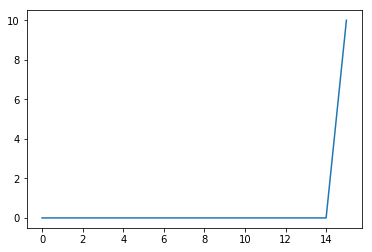

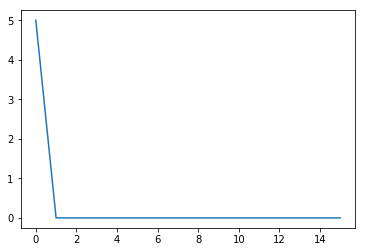

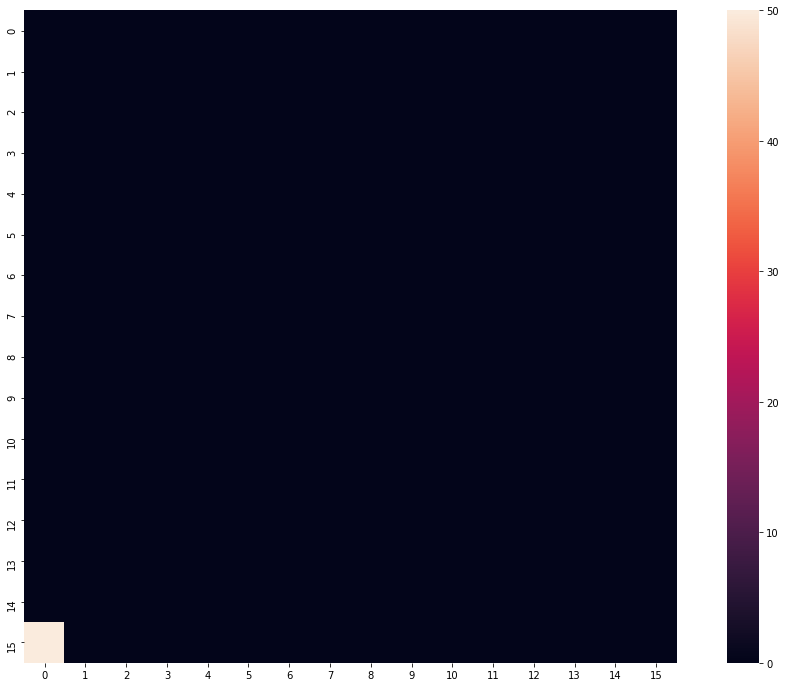

In [9]:
print('\n' + 'Transport cost: ' + str(cost))

plt.plot(source)
plt.show()

plt.plot(target)
plt.show()

plt.gcf().set_size_inches(18,12)
plt.gca().set_aspect('equal')

sns.heatmap(map)

Single mass transported - cost of one (distance is 1, mass == 1, distance * mass = 1)

## Test case: linear to linear

Linear to linear mapping should produce mapping of quarter circle

In [10]:
m = 128
n = 128

source = np.array(list(range(m)))
target = np.array(list(reversed(range(n))))

# linear to linear, map should be quarter circle

In [11]:
map, cost = northwestcorner(source, target)


Transport cost: 0.23314587684275015


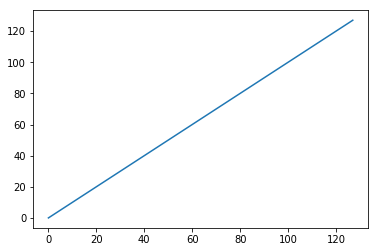

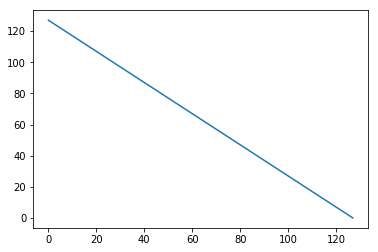

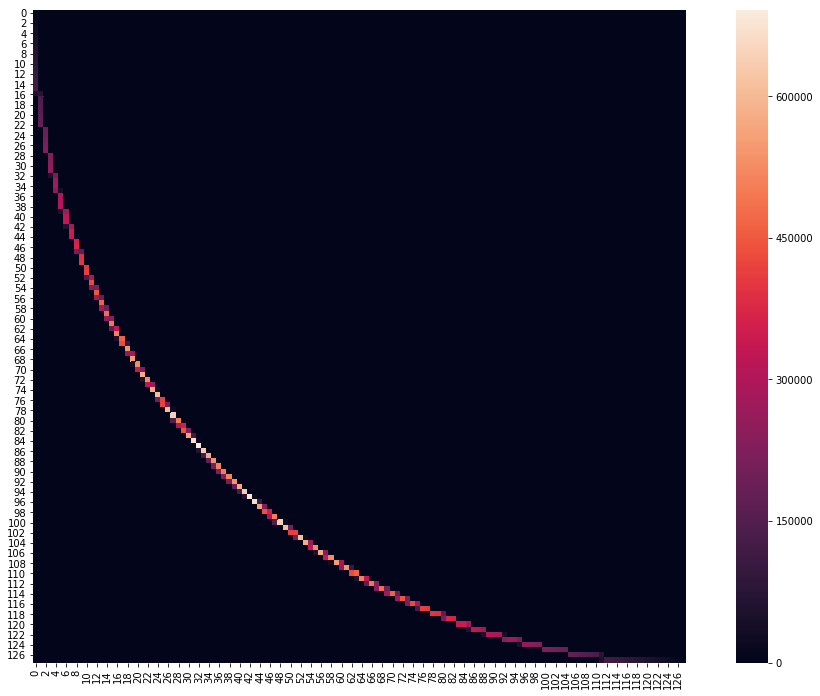

In [12]:
print('\n' + 'Transport cost: ' + str(cost))

plt.plot(source)
plt.show()

plt.plot(target)
plt.show()

plt.gcf().set_size_inches(18,12)
plt.gca().set_aspect('equal')

sns.heatmap(map)